# **Upload Dataset**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving PJME_hourly.csv to PJME_hourly (1).csv


# **Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings("ignore")

# **Load Dataset**

In [3]:
df = pd.read_csv("PJME_hourly.csv")
df.head()

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


# Convert datetime:

In [4]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df = df.sort_values('Datetime')

# **EDA**

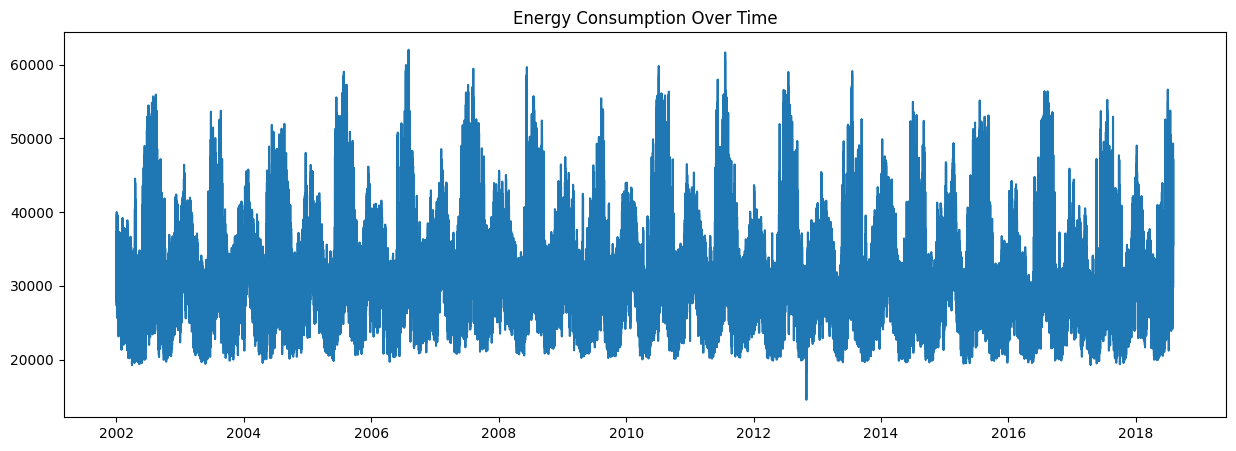

In [5]:
plt.figure(figsize=(15,5))
plt.plot(df['Datetime'], df['PJME_MW'])
plt.title("Energy Consumption Over Time")
plt.show()

# **Feature Engineering**

In [6]:
df['hour'] = df['Datetime'].dt.hour
df['dayofweek'] = df['Datetime'].dt.dayofweek
df['month'] = df['Datetime'].dt.month

# Train-Test **Split**

In [7]:
X = df[['hour','dayofweek','month']]
y = df['PJME_MW']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# Train **Model**

In [8]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

# Evaluate **Model**

In [9]:
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print("MAE:", mae)
print("RMSE:", rmse)

MAE: 3042.3636318641297
RMSE: 3814.7994729376037


# Plot **Predictions**

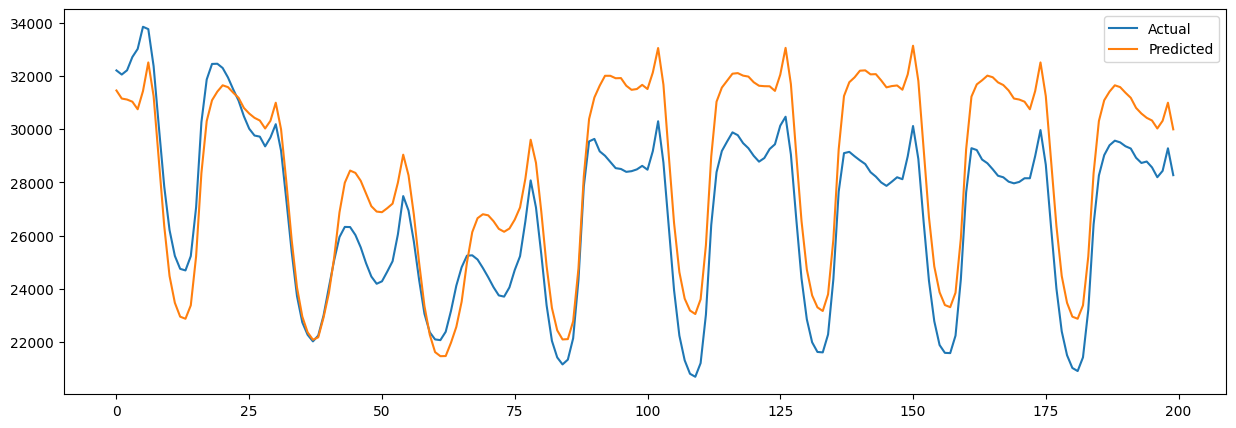

In [10]:
plt.figure(figsize=(15,5))
plt.plot(y_test.values[:200], label="Actual")
plt.plot(predictions[:200], label="Predicted")
plt.legend()
plt.show()